In [2]:
import pandas as pd

#### Reading Movie Information from given dataset

In [3]:
df = pd.read_csv("Amazon - Movies and TV Ratings.csv")
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.keys()

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

In [5]:
movies = pd.DataFrame(df.drop('user_id', axis=1))
movies.Movie127.isnull().sum()

2535

#### 1.Which movies have maximum views/ratings?

In [6]:
movie_views = []
movieslist = []
ratings = []
for movie in range(1, len(movies.keys())+1):
    x = "Movie"+str(movie)
    movie_views.append(len(movies) - movies[x].isnull().sum())
    movieslist.append(x)
    ratings.append(movies[x].mean())
print(movie_views)

[1, 1, 1, 2, 29, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 320, 1, 1, 2, 1, 1, 2, 3, 5, 1, 3, 1, 3, 243, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 7, 2, 1, 1, 1, 1, 1, 1, 2, 17, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 12, 2, 1, 1, 3, 21, 1, 1, 83, 18, 128, 101, 2, 3, 6, 3, 5, 1, 2, 1, 5, 2, 272, 4, 3, 1, 39, 54, 13, 8, 39, 2, 4, 7, 1, 1, 11, 5, 8, 3, 4, 4, 1, 4, 5, 2, 2313, 3, 3, 4, 4, 3, 1, 6, 1, 2, 3, 13, 4, 578, 7, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 2, 1, 4, 66, 2, 6, 25, 15, 13, 4, 1, 2, 4, 4, 4, 3, 1, 2, 15, 4, 1, 1, 1, 1, 7, 1, 2, 30, 1, 17, 24, 9, 1, 6, 5, 7, 6, 10, 7, 7, 1, 9, 5, 2, 1, 8, 3, 6, 1, 8, 35, 13]


In [7]:
movie_views = pd.DataFrame(movie_views)
movie_views['moviename'] = movieslist
movie_views['ratings'] = ratings

In [8]:
movie_views['views'] = movie_views[0]

In [9]:
movie_views.drop([0],axis=1, inplace=True)
movie_views

,moviename,ratings,views
0,Movie1,5.000000,1
1,Movie2,5.000000,1
2,Movie3,2.000000,1
3,Movie4,5.000000,2
4,Movie5,4.103448,29
...,...,...,...
201,Movie202,4.333333,6
202,Movie203,3.000000,1
203,Movie204,4.375000,8
204,Movie205,4.628571,35


In [10]:
movie_views = movie_views.sort_values(by=["views"], ascending=False)

In [11]:
movie_views[movie_views.views==movie_views.views.max()].moviename

126    Movie127
Name: moviename, dtype: object

##### From the above analysis Movie 127 has the maximum views/rating.

#### Define the top five movies with max ratings

In [12]:
movie_views_max_rating = movie_views.sort_values(by=["views","ratings"], ascending=[False, False])
movie_views_max_rating.head()

,moviename,ratings,views
126,Movie127,4.111976,2313
139,Movie140,4.833910,578
15,Movie16,4.518750,320
102,Movie103,4.562500,272
28,Movie29,4.806584,243


#### Define the top 5 movies with the least audience.

In [13]:
movie_views_max_rating_min_audience = movie_views.sort_values(by=["ratings", "views"], ascending=[False, True])
movie_views_max_rating_min_audience.head()

,moviename,ratings,views
32,Movie33,5.0,1
164,Movie165,5.0,1
198,Movie199,5.0,1
6,Movie7,5.0,1
20,Movie21,5.0,1


#### Visualize the data

In [14]:
import matplotlib.pyplot as plt

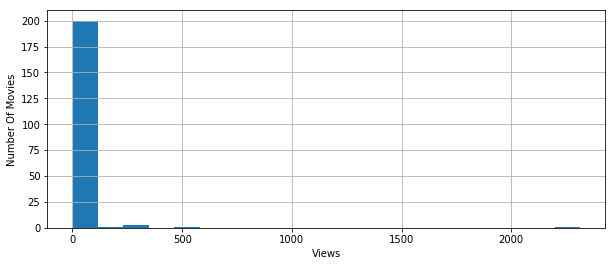

In [26]:
plt.figure(figsize=(10,4))
plt.xlabel('Views')
plt.ylabel('Number Of Movies')
movie_views_max_rating.views.hist(bins=20)

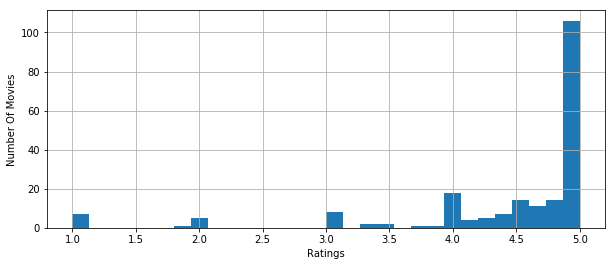

In [23]:
plt.figure(figsize=(10,4))
plt.xlabel('Ratings')
plt.ylabel('Number Of Movies')
movie_views_max_rating.ratings.hist(bins=30)

In [27]:
import seaborn as sn

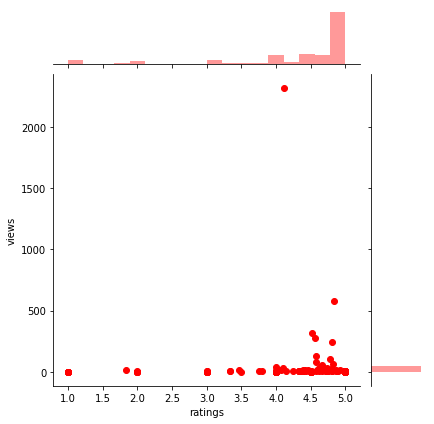

In [35]:
sn.jointplot(x="ratings", y="views", data=movie_views_max_rating, color="red")